In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import patches
from rich import print

firing rate: 100.000Hz

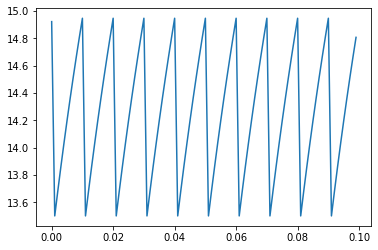

In [2]:
# エンコーダニューロンの膜電位の推移

dt = 1e-3
sim_time = 0.1
v_rest = 13.5
v_reset = 13.5
v_th = 15.
tau_m = 0.03
amp = 5.5

t = 0.
v = np.random.uniform(v_reset, v_th)
t_list = []
v_list = []
spike_list = []

while t < sim_time:
    act = 1.   # actが常に最大の1の場合
    v += (v_rest + amp * act - v) * dt / tau_m
    if v > v_th:
        spike_list.append(1)
        v = v_reset
    else:
        spike_list.append(0)

    t_list.append(t)
    v_list.append(v)
    t += dt

print(f'firing rate: {np.mean(spike_list) / dt:.3f}Hz')
plt.plot(t_list, v_list)
plt.show()

mean: 2.946

std : 0.425

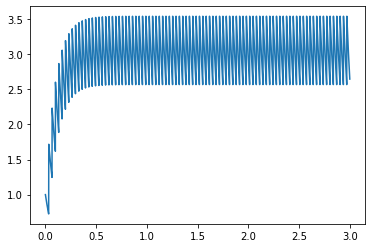

In [3]:
# トレースの遷移

dt = 1e-3
sim_time = 3.
tau_decay = 0.1
fire_rate = 30.

t = 0.
trace = 0.
t_buf = []
trace_buf = []
sim_steps = int(sim_time / dt)
fire_steps = int(1. / (fire_rate * dt))

for step in range(sim_steps):
    t += dt
    spike = (step % fire_steps == 0)
    trace += spike - trace / tau_decay * dt

    t_buf.append(t)
    trace_buf.append(trace)

print(f'mean: {np.mean(trace_buf):.3f}')
print(f'std : {np.std(trace_buf):.3f}')
plt.plot(t_buf, trace_buf)

Absolute value of the eigenvalues:
  min   : 0.009212
  max   : 0.900000
  mean  : 0.573
  median: 0.605

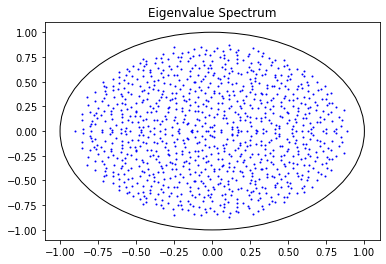

In [4]:
# シナプス重みが完全に一様分布のときの固有値分布

num = 1000
density = 0.03
rho = 0.9

w_mat = rnd.uniform(-1, 1, (num, num))
connected = rnd.uniform(0, 1, (num, num)) < density
w_mat *= connected

eig, _ = LA.eig(w_mat)
r = abs(eig)

w_mat *= rho / max(r)

eig, _ = LA.eig(w_mat)
x = eig.real
y = eig.imag
r = abs(eig)

stable_idx = np.where(r <= 1.)
unstable_idx = np.where(r > 1.)
print(
    "Absolute value of the eigenvalues:\n"
    f'  min   : {np.min(r):3f}\n'
    f'  max   : {np.max(r):3f}\n'
    f'  mean  : {np.mean(r):.3f}\n'
    f'  median: {np.median(r):.3f}\n'
)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Eigenvalue Spectrum")
# ax.set_xlim(-2.5, 2.5)
# ax.set_ylim(-2.5, 2.5)
ax.scatter(x[stable_idx], y[stable_idx], s=1., color="b")
ax.scatter(x[unstable_idx], y[unstable_idx], s=1., color="r")
ax.add_patch(patches.Circle(xy=(0., 0.), radius=1., ec="k", fill=False))